<a href="https://colab.research.google.com/github/dhlee3146/G5_final_project/blob/main/G5_final_project_final_ver_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#@markdown ####  👉 Install Before Start Your Class

%%capture
!pip install wordcloud matplotlib gradio gtts nltk pyqrcode pypng pandas

## 0. Homework



*   Check the word list
*   Fill in the blank
*   Check the QR (invite the padlet)







In [1]:
# Check the Word list

In [ ]:
#fill in the balank app

In [ ]:
# QR instruction

## 1. Preview


*   Watching the summary video
*   Guessing the point



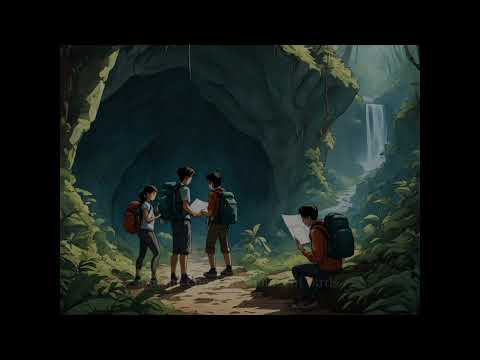

In [2]:
#@markdown Video to watch (from Youtube): Watching the summary video

from IPython.display import YouTubeVideo

YouTubeVideo('tbcTrKZldbw', width=600, height=400)  # This is an example video ID

## 2. Learning the context


1.   Teaching Textbook Material_Using Gradio App
2.   Grammar teaching - group activity






In [18]:
#@markdown #### ※ 1. Teaching Textbook Material_Using Gradio app

mytext = "In the small town of Willow Creek, nestled between lush hills and a winding river, four friends—Emma, Jake, Mia, and Liam—stumbled upon an old map tucked inside a dusty library book titled 'Legends of the Lost.' The map depicted a hidden cave known only as the Cave of Whispers, rumored to hold a mysterious treasure that no one in Willow Creek had ever found. The friends, buzzing with excitement, planned an adventure to discover the cave. They packed their backpacks with essentials: flashlights, a compass, snacks, and a camera to document their journey. With the map as their guide, they set off early one Saturday morning, the summer sun casting long shadows through the forest. Their journey led them through thick woods where the light danced between the leaves, creating patterns on the forest floor. Birds chirped melodiously, providing a soundtrack to their expedition. After hours of hiking, the map directed them to a hidden path veiled by overgrown bushes. Pushing through, they finally came to a halt in front of a towering cliff face. In its center, concealed behind hanging vines, was the entrance to the Cave of Whispers. With hearts racing, the friends entered the cave. Inside, it was cool and damp, the air filled with the echo of dripping water. Their flashlights cut through the darkness, revealing ancient rock formations and walls that seemed to hum with old secrets. As they ventured deeper, they found carvings on the cave walls—mysterious symbols that none of them could decipher. Mia, who had a keen interest in history, took several photos, hoping to research them later. Suddenly, Jake, who was leading, halted. Ahead, in a small clearing within the cave, lay a wooden chest. It was old and covered in dust, with intricate carvings that shimmered under their flashlight beams. The friends exchanged looks of awe and nervous excitement. Liam carefully opened the chest to reveal its contents: golden coins, sparkling jewels, and a parchment that looked centuries old. Emma carefully unfolded the parchment, revealing a message written in an elegant script. It read: To those who seek adventure, true treasure lies not in gold but in the journey and the friendships forged along the way. The friends sat back, the weight of the words sinking in. They realized that the real treasure was their shared adventure—the challenges they overcame together and the memories they created. As they left the cave, the sun was setting, casting a golden glow over the landscape. They didn’t take anything from the chest, choosing instead to leave it for the next group of adventurers. Back home, they shared their story, the mysterious symbols, and the sage words of the parchment. The Cave of Whispers had given them a treasure far greater than they had imagined: a story of friendship, courage, and adventure that they would cherish forever."

In [19]:
#@markdown Gradio app for Read-Aloud practice (by sentences)
import gradio as gr
from gtts import gTTS
from nltk import tokenize
import os

# Import necessary nltk libraries
import nltk
nltk.download('punkt')


# Tokenize the predefined text into sentences
sentences = tokenize.sent_tokenize(mytext)

def generate_audio(selected_item):
    index_str = selected_item.split('.')[0]
    index = int(index_str) - 1  # Adjust for 0-based index

    if 0 <= index < len(sentences):
        sentence = sentences[index]
        tts = gTTS(text=sentence, lang='en')
        audio_path = f'sentence_{index + 1}.mp3'
        tts.save(audio_path)
        return audio_path
    else:
        return "Invalid sentence number"

# Gradio interface
iface = gr.Interface(
    fn=generate_audio,
    inputs=gr.Dropdown(choices=[f"{i + 1}. {s}" for i, s in enumerate(sentences)], label="Select Sentence"),
    outputs=gr.Audio(label="Audio of Selected Sentence"),
    title="Text to Audio by Sentence",
    description="Select a sentence number to hear it spoken."
)

iface.launch()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://34b4f4ec0b1f122e9a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [12]:
# grammar teaching - slide

#@markdown Introduction Slides
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = ['https://github.com/MK316/Spring2023/raw/main/DL/data/DLEE_S24.001.jpeg',
        'https://github.com/MK316/Spring2023/raw/main/DL/data/DLEE.002.jpeg',
        'https://github.com/MK316/Spring2023/raw/main/DL/data/DLEE.003.jpeg',
        'https://github.com/MK316/Spring2023/raw/main/DL/data/DLEE.004.jpeg',
        'https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.003.jpeg',
        'https://github.com/MK316/Spring2023/raw/main/DL/data/DLEE.005.jpeg',
        'https://github.com/MK316/Spring2023/raw/main/DL/data/DLEE.006.jpeg',
        'https://github.com/MK316/Spring2023/raw/main/data/programminglanguage22.png']

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 7)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="800", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

## 3. Group Activity



1.   about grammar activity
2.   about context activity - comprehension


In [15]:
#### about grammar activity
import gradio as gr

# The story "The Cave of Whispers" with blanks for cloze questions
story = "https://raw.githubusercontent.com/MK316/Spring2024/main/Sample/storysample.txt"

# Cloze questions
cloze_questions = [
    {"question": "Once upon a time in the small town of Windale, two adventurous friends, Mary and John, ______ (stumble) upon an old map in John’s attic.", "answer": "stumbled"},
    {"question": "The map was dusty and the edges ______ (fray), but it clearly marked a trail leading to the mysterious Cave of Whispers.", "answer": "were frayed"},
    {"question": "Mary, with her wild, curly hair and eyes full of mischief, was the first ______ (propose) an adventure.", "answer": "to propose"},
    {"question": "John, more cautious but unable to resist a challenge, ______ (agree).", "answer": "agreed"},
    {"question": "The next morning, armed with their backpacks and an unstoppable curiosity, Mary and John ______ (set) out.", "answer": "set"},
    {"question": "As they ______ (approach), the air grew cooler and the light dimmed, shadowed by the towering trees.", "answer": "approached"},
    {"question": "Finally, they found it—a gaping entrance in the hillside, partially ______ (hide) by moss and ivy.", "answer": "hidden"},
    {"question": "The cave seemed to respond, the floor ______ (shift) slightly under their feet, revealing a small, hidden drawer.", "answer": "shifting"},
    {"question": "Inside, they found a chest filled not with gold, but with an assortment of strange, ancient coins and a perfectly ______ (preserve) pirate's compass.", "answer": "preserved"},
    {"question": "Mary looked over at John and said, “Let’s keep ______ (explore), there’s so much more out there.”", "answer": "exploring"},
]

# Function to handle the cloze quiz
def cloze_quiz(name, *answers):
    score = 0
    results = []
    for i, question in enumerate(cloze_questions):
        if answers[i].strip().lower() == question["answer"].lower():
            score += 1
            results.append(f"Question {i+1}: Correct\n")
        else:
            results.append(f"Question {i+1}: Incorrect, the correct answer is: {question['answer']}\n")
    result_text = f"* Name: {name}\n* Score: {score} out of {len(cloze_questions)}\n" + "\n".join(results)

    return result_text

# Add the input for the name
inputs = [gr.Textbox(label="Enter your name")] + [gr.Textbox(label=q["question"]) for q in cloze_questions]
outputs = [gr.Textbox(label="Results")]

iface = gr.Interface(fn=cloze_quiz, inputs=inputs, outputs=outputs, description="Cloze Quiz for 'The Cave of Whispers'")
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a637da394f8edf90ee.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [16]:
# about context activity - comprehension

#@markdown ### Run before using
%%capture
!pip install gradio

In [17]:
#@markdown ## **Assignment**
import gradio as gr

story = "https://raw.githubusercontent.com/jmyoon7442/jmyoon7442/main/The%20Cave%20of%20Whisper.txt"

# Define the comprehension questions
questions = [
    {"question": "1. What did they bring on their adventure?", "options": ["1) water, snacks, and a tent", "2) maps, books, and a compass", "3) flashlights, a compass, and a camera"], "answer": "3) flashlights, a compass, and a camera"},
    {"question": "2. Who did read the message?", "options": ["1) Emma", "2) Liam", "3) Jake", "4) Mia"], "answer": "1) Emma"},
    {"question": "3. What did the friends find inside the Cave of Whispers?", "options": ["1) A map to another treasure", "2) An old parchment", "3) A magical stone"], "answer": "2) An old parchment"},
    {"question": "4 What did the message on the ancient parchment say?", "options" : ["1) Finders keepers, losers weepers.", "2) Gold is the measure of true wealth.", "3) True treasure lies in gold and gems only.", "4) True treasure lies not in gold but in the journey and the friendships forged along the way."], "answer": "4) True treasure lies not in gold but in the journey and the friendships forged along the way."},
    {"question": "5. The four friends found an old map in a newly published book", "options": ["True", "False"], "answer": "False"},
    {"question": "6. The four friends set the adventure in the morning.", "options": ["True", "False"], "answer": "False"},
    {"question": "7. The four friends found a wooden chest in the Cave of Whispers, which contained golden coins and jewels.", "options": ["True", "False"], "answer": "True"},
    {"question": "8. The four friends decided to sell the treasure and split the money.", "options": ["True", "False"], "answer": "True"},
    {"question": "9. The friends used a GPS device and a smartphone to document their journey", "options": ["True", "False"], "answer": "False"}
]


# Function to display the story and ask questions
def quiz(*answers):
    score = 0
    incorrect = []
    for i, question in enumerate(questions):
        if answers[i] == question["answer"]:
            score += 1
        else:
            incorrect.append(f"Question {i+1}: Correct answer is {question['answer']}")
    results = "\n".join(incorrect)
    return score, results

story_display = gr.Markdown(story)
inputs = [gr.Radio(label=q["question"], choices=q["options"]) for q in questions]
outputs = [gr.Textbox(label="Score"), gr.Textbox(label="Incorrect Answers")]

iface = gr.Interface(fn=quiz, inputs=inputs, outputs=outputs, description="Comprehension Quiz for 'The Cave of Whispers'")
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6d550ed130ac11ea11.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## 4. Feedback



*   Making a feedback; upload your score to padlet

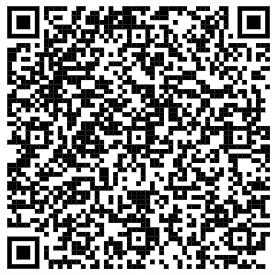

## 5. Review



*   Word cloud






In [ ]:
#@markdown #### ※ Run before making Word Cloud

text = "In the small town of Willow Creek, nestled between lush hills and a winding river, four friends—Emma, Jake, Mia, and Liam—stumbled upon an old map tucked inside a dusty library book titled 'Legends of the Lost.' The map depicted a hidden cave known only as the Cave of Whispers, rumored to hold a mysterious treasure that no one in Willow Creek had ever found. The friends, buzzing with excitement, planned an adventure to discover the cave. They packed their backpacks with essentials: flashlights, a compass, snacks, and a camera to document their journey. With the map as their guide, they set off early one Saturday morning, the summer sun casting long shadows through the forest. Their journey led them through thick woods where the light danced between the leaves, creating patterns on the forest floor. Birds chirped melodiously, providing a soundtrack to their expedition. After hours of hiking, the map directed them to a hidden path veiled by overgrown bushes. Pushing through, they finally came to a halt in front of a towering cliff face. In its center, concealed behind hanging vines, was the entrance to the Cave of Whispers. With hearts racing, the friends entered the cave. Inside, it was cool and damp, the air filled with the echo of dripping water. Their flashlights cut through the darkness, revealing ancient rock formations and walls that seemed to hum with old secrets. As they ventured deeper, they found carvings on the cave walls—mysterious symbols that none of them could decipher. Mia, who had a keen interest in history, took several photos, hoping to research them later. Suddenly, Jake, who was leading, halted. Ahead, in a small clearing within the cave, lay a wooden chest. It was old and covered in dust, with intricate carvings that shimmered under their flashlight beams. The friends exchanged looks of awe and nervous excitement. Liam carefully opened the chest to reveal its contents: golden coins, sparkling jewels, and a parchment that looked centuries old. Emma carefully unfolded the parchment, revealing a message written in an elegant script. It read: To those who seek adventure, true treasure lies not in gold but in the journey and the friendships forged along the way. The friends sat back, the weight of the words sinking in. They realized that the real treasure was their shared adventure—the challenges they overcame together and the memories they created. As they left the cave, the sun was setting, casting a golden glow over the landscape. They didn’t take anything from the chest, choosing instead to leave it for the next group of adventurers. Back home, they shared their story, the mysterious symbols, and the sage words of the parchment. The Cave of Whispers had given them a treasure far greater than they had imagined: a story of friendship, courage, and adventure that they would cherish forever."

Title: The Cave of Whisper


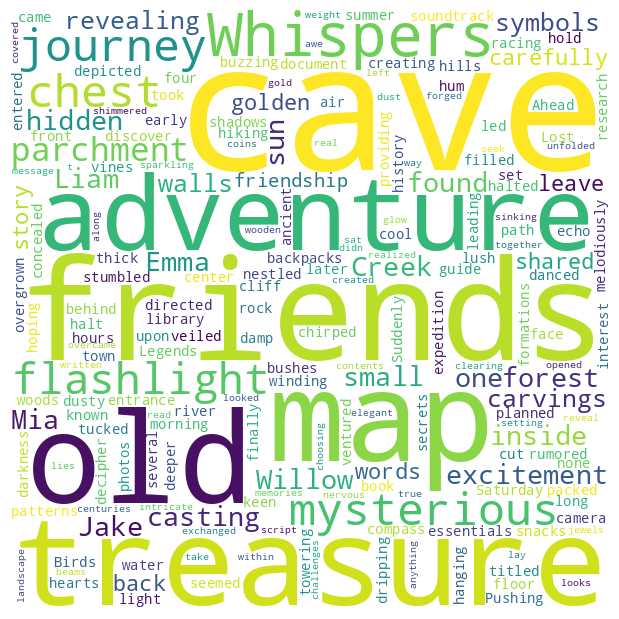

<Figure size 640x480 with 0 Axes>

In [ ]:
#@markdown ## ☁ Word Cloud of 'The Cave of Whipers'

#!pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud

wordcloud = WordCloud(width = 600, height = 600,
                      background_color ='white',
                      min_font_size = 10).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize = (6, 6), facecolor = None) # e.g., facecolor = "gray"
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

print("Title: The Cave of Whisper") # 제목을 output에 프린트하고 싶을 때
plt.show()
plt.savefig('myimage.png')

## 6. Assignment

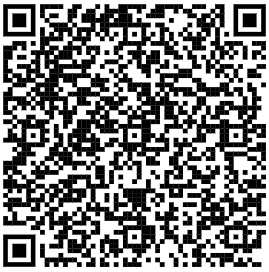



*   comment your own sentences

